In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
possum_data = pd.read_csv('https://richardson.byu.edu/220/possum.csv')
possum_data.to_csv("possum.csv", index=False)

possum_data.head(5)


,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


<Figure size 2000x1500 with 0 Axes>

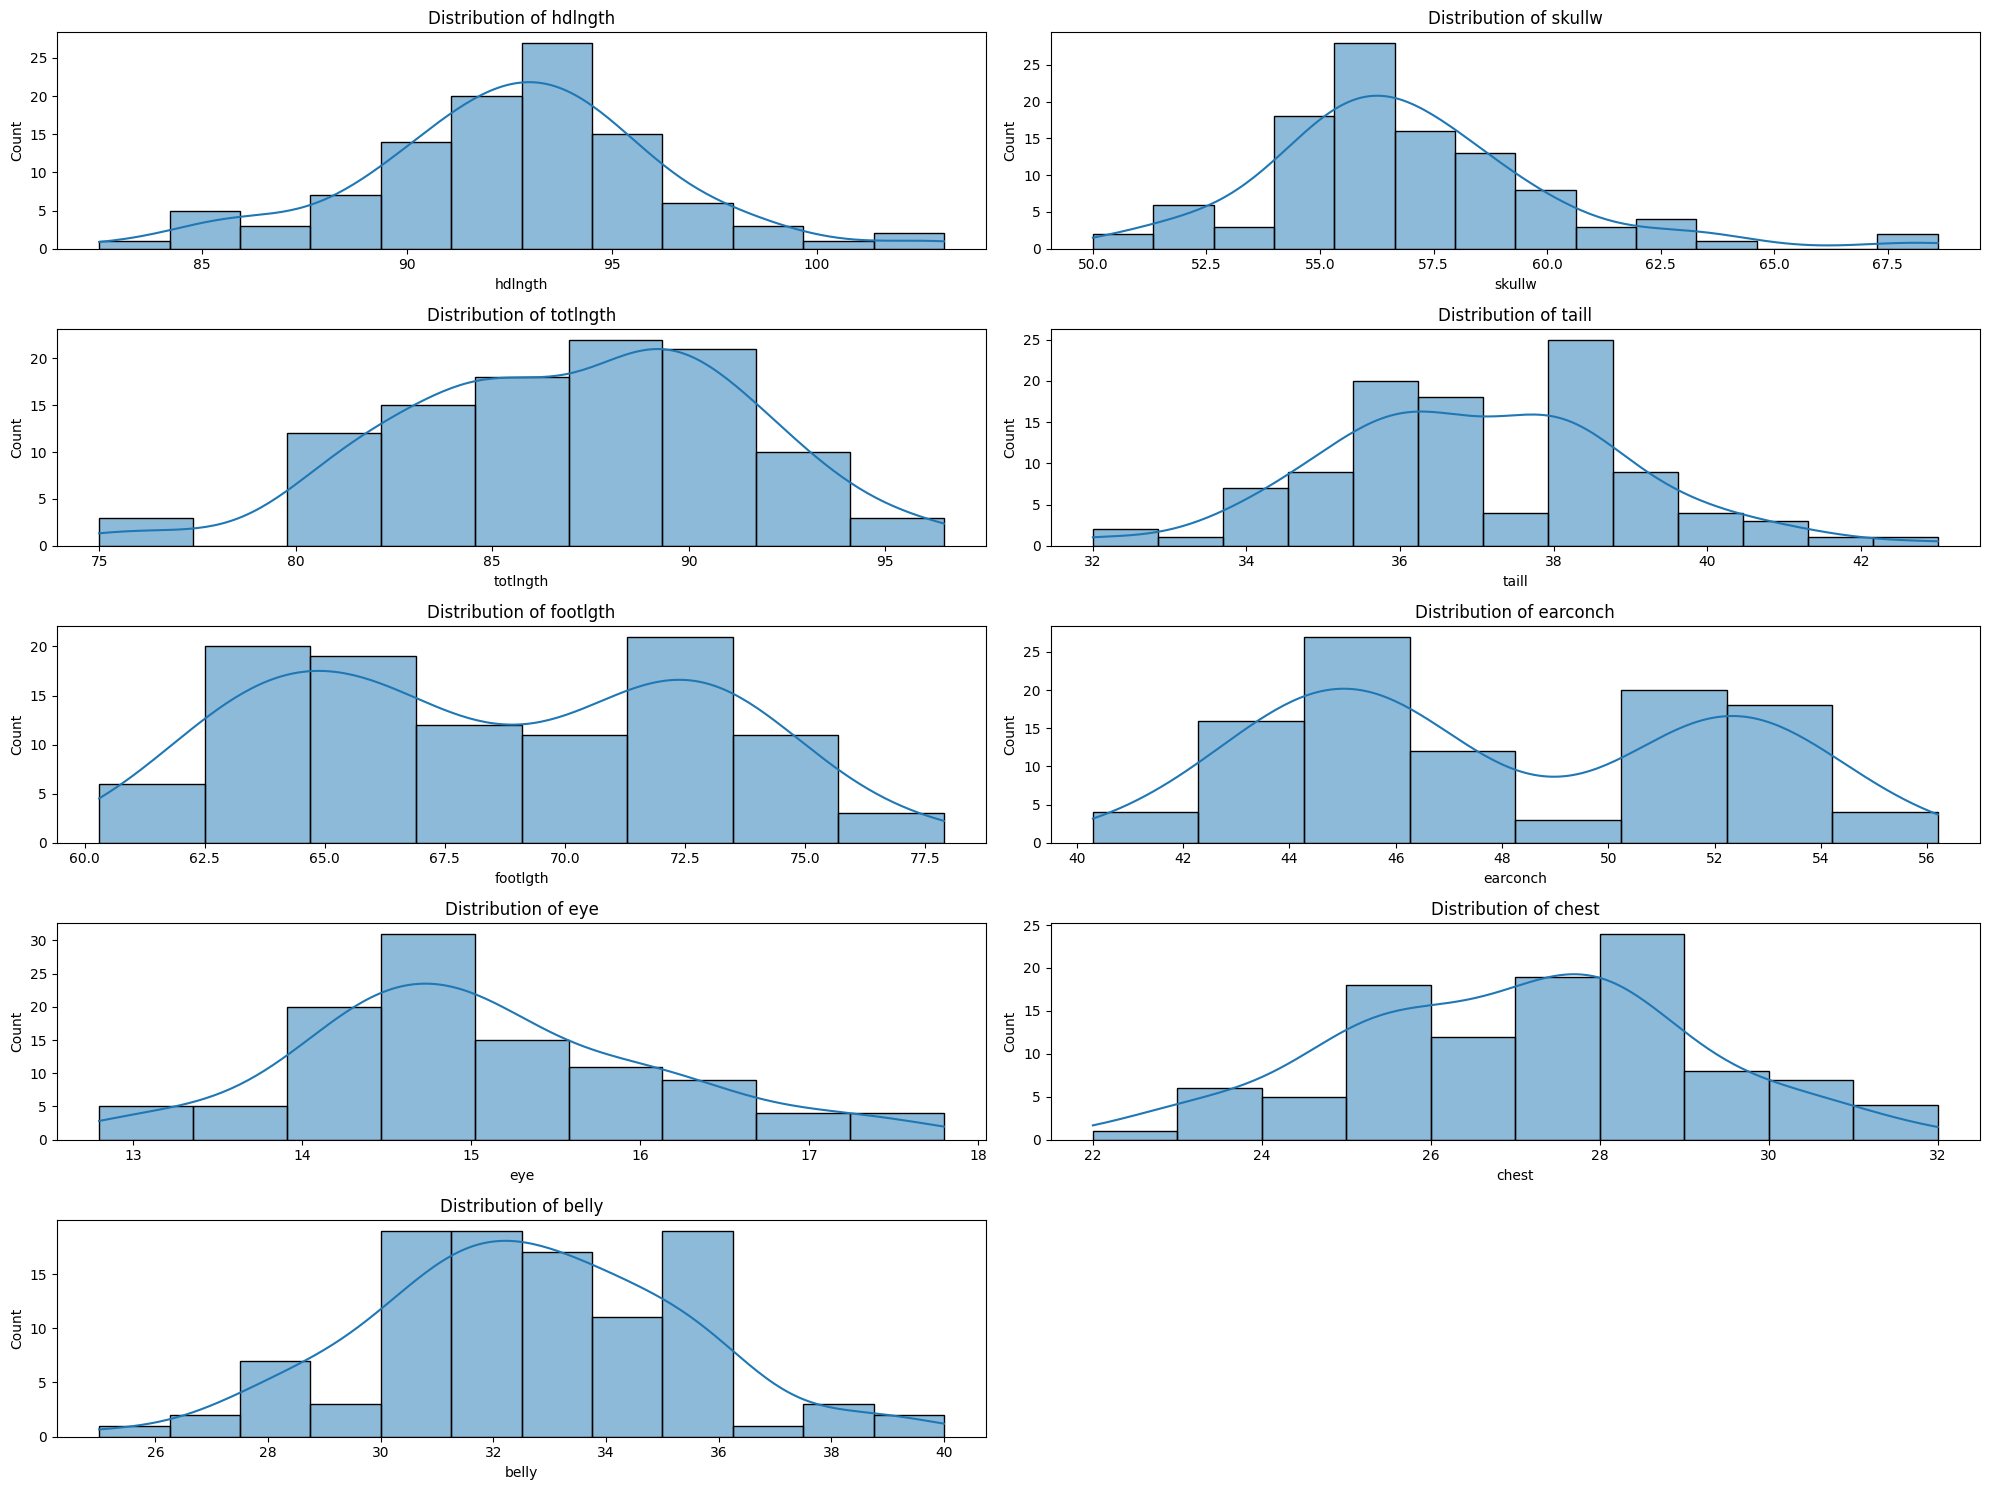

In [ ]:

# Verifying that missing values have been removed
missing_values_after_cleaning = possum_data.isnull().sum()

# Setting up the plotting area
plt.figure(figsize=(20, 15))
feature_columns = possum_data.columns.drop('age')
number_of_columns = len(feature_columns)

# Investigating the distribution of each variable using histograms
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_columns):
    plt.subplot((number_of_columns + 1) // 2, 2, i + 1)
    sns.histplot(possum_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Checking the correlation matrix to understand relationships between variables
correlation_matrix = possum_data.corr()

plt.show()


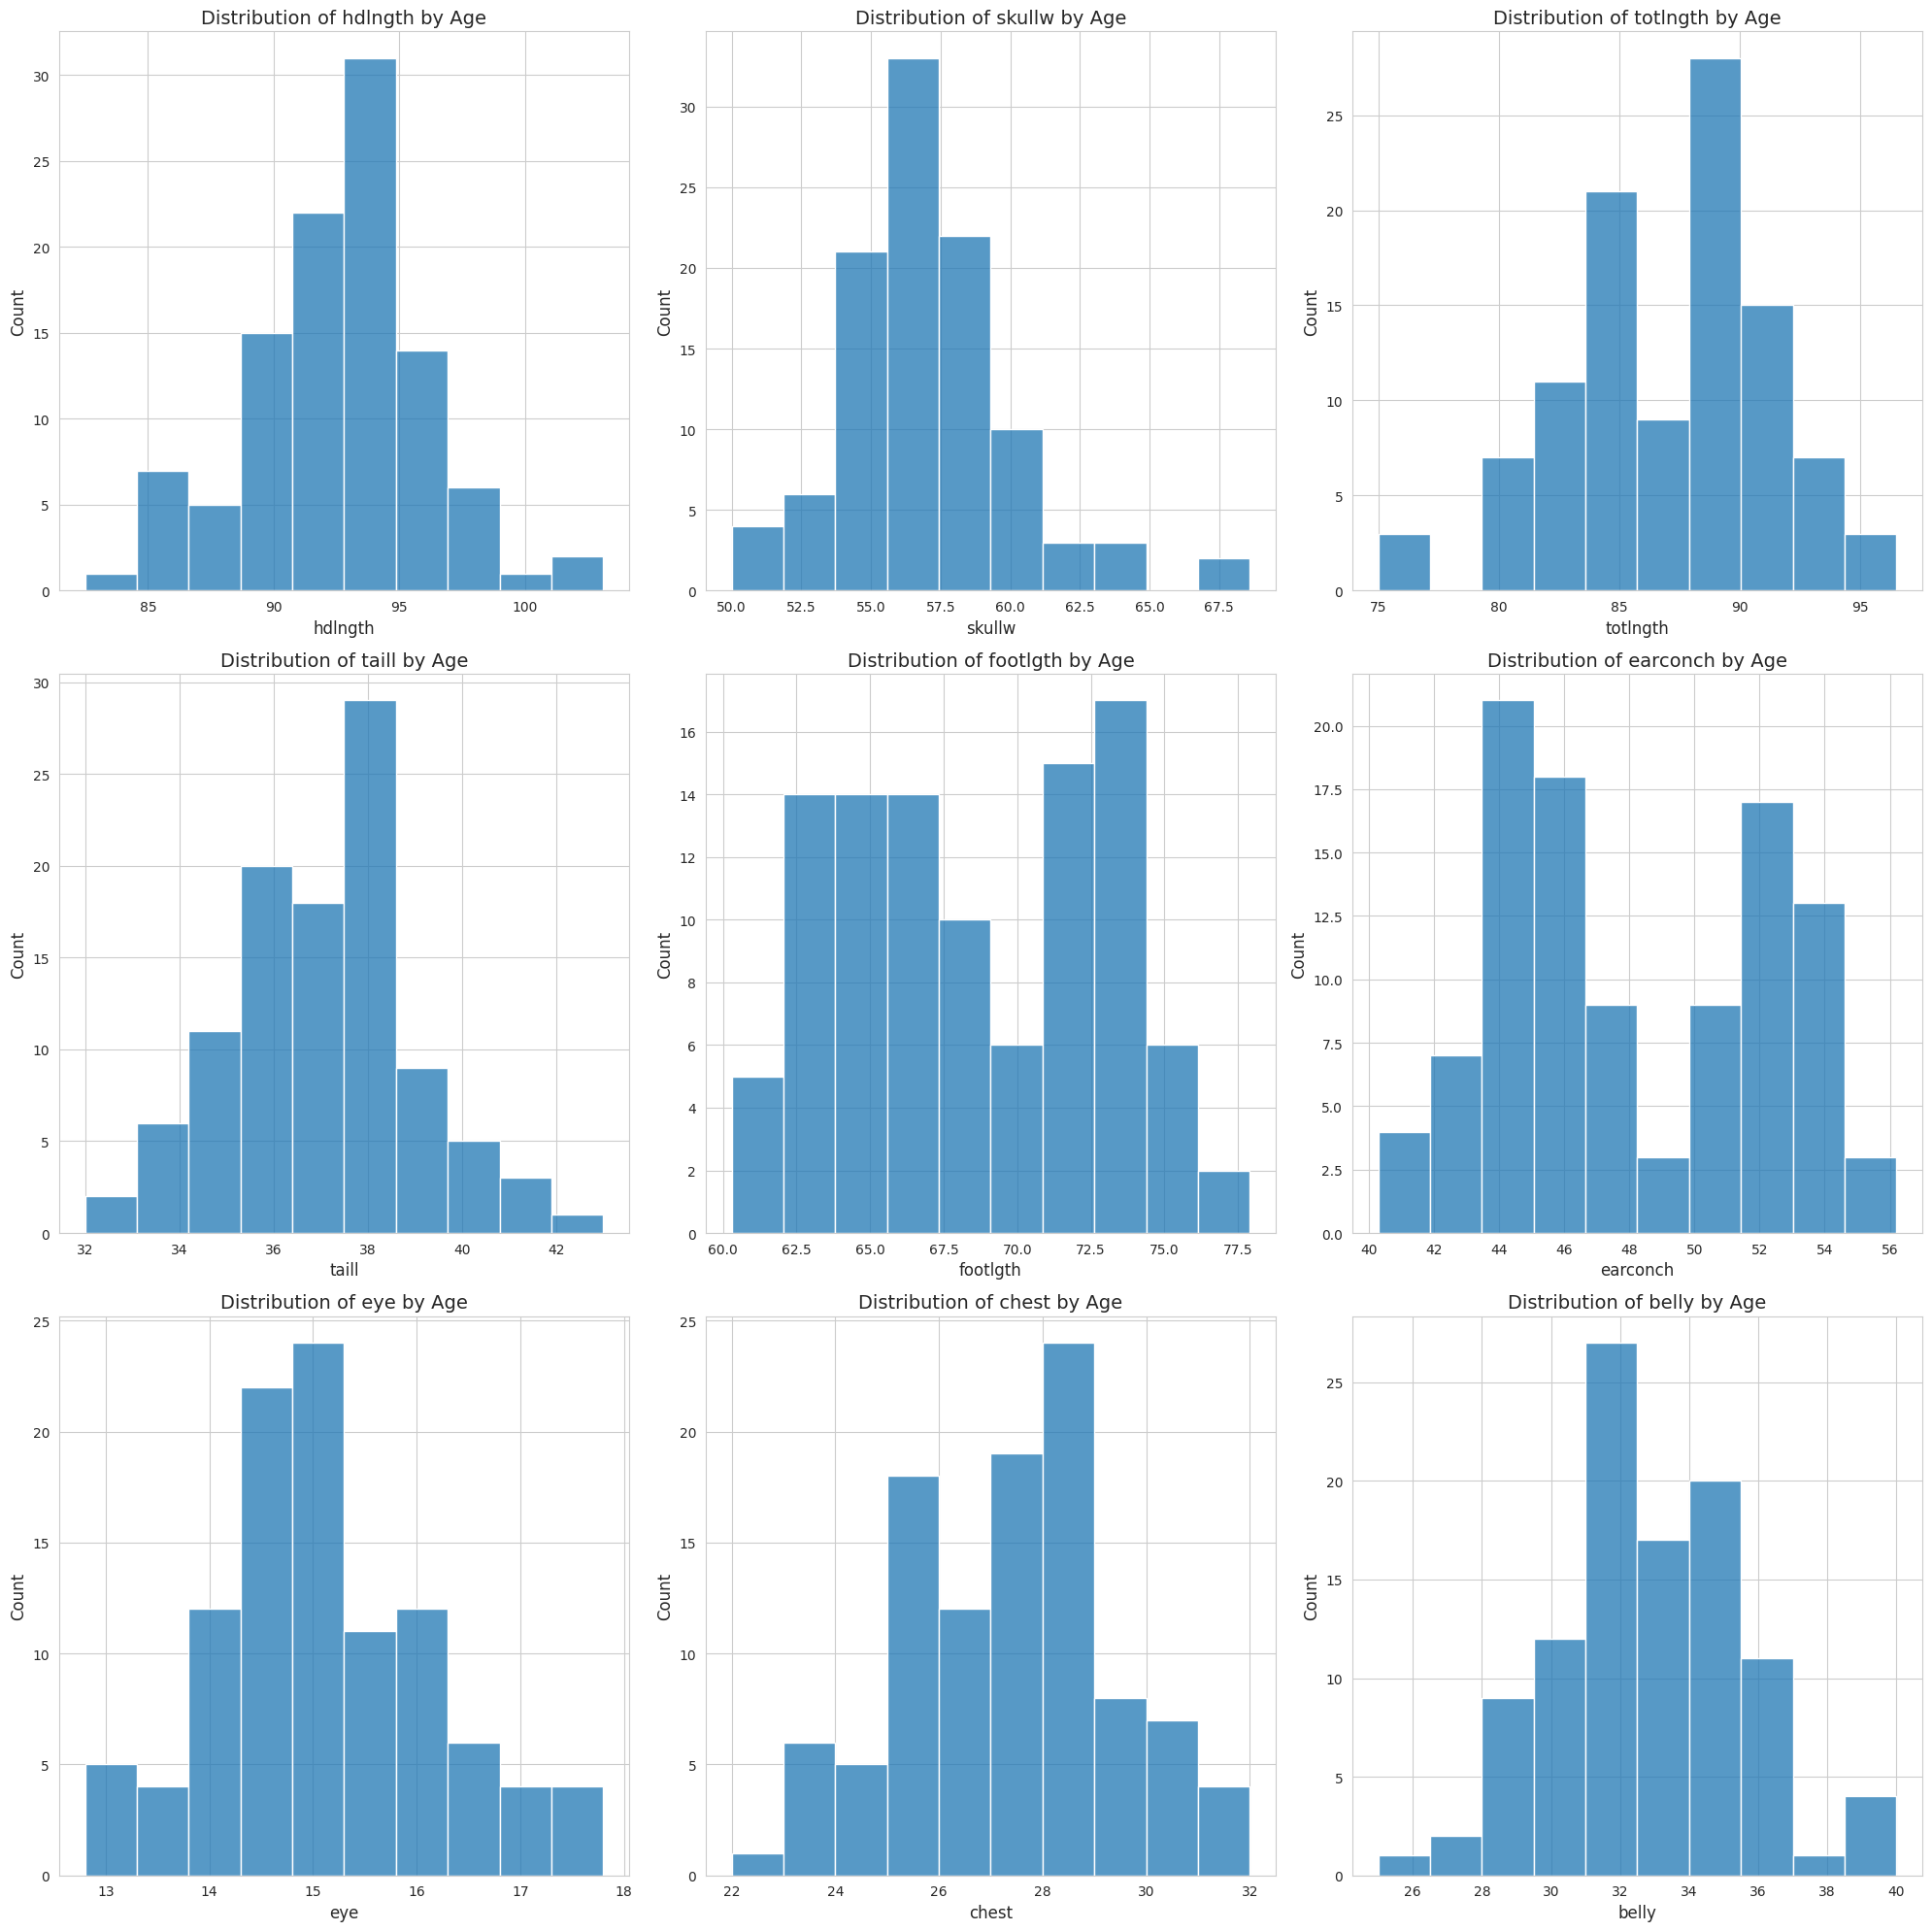

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting each variable against age
features = possum_data.columns[1:]  # all features except 'age'
n_rows = 3
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))


for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=possum_data, x=feature, bins=10, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of {feature} by Age', fontsize=14)
    axs[row, col].set_xlabel(feature, fontsize=12)
    axs[row, col].set_ylabel('Count', fontsize=12)

# Adjusting layout for better fit and displaying the plots
plt.tight_layout()
plt.show()


# Adjusting layout for better fit and displaying the plots
plt.tight_layout()
plt.show()


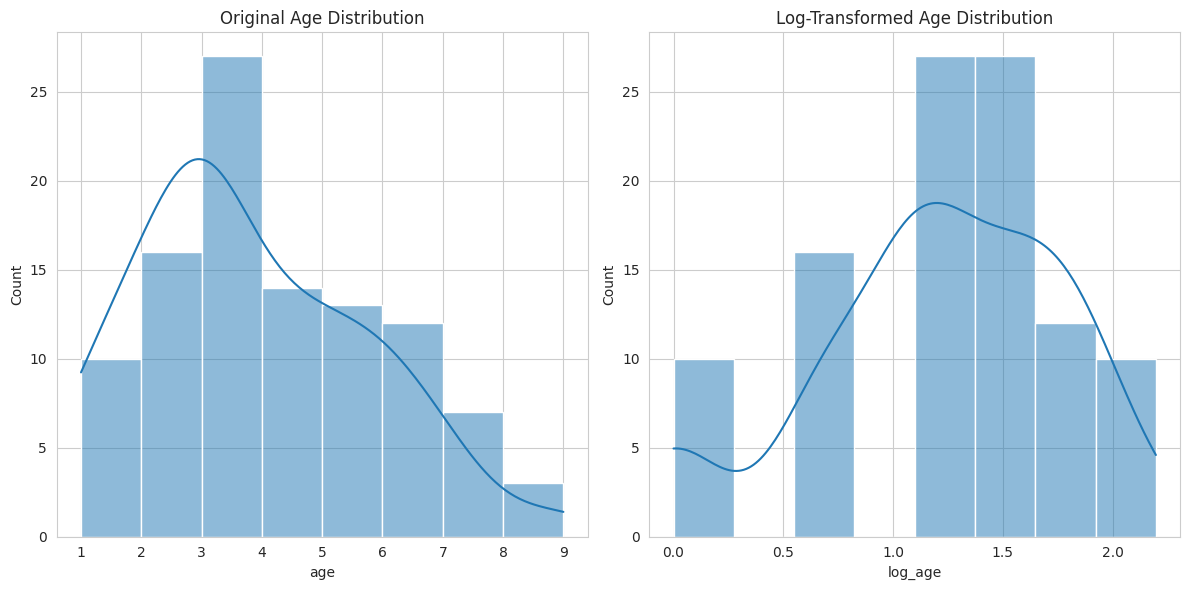

In [ ]:
import numpy as np

# Since age can be 1 or larger, we can safely apply the log transformation
possum_data['log_age'] = np.log(possum_data['age'])

# Let's now plot the distribution of the original and log-transformed age to compare
plt.figure(figsize=(12, 6))

# Original age distribution
plt.subplot(1, 2, 1)
sns.histplot(possum_data['age'], kde=True)
plt.title('Original Age Distribution')

# Log-transformed age distribution
plt.subplot(1, 2, 2)
sns.histplot(possum_data['log_age'], kde=True)
plt.title('Log-Transformed Age Distribution')

plt.tight_layout()
plt.show()


2. Apply log transformations to variables that exhibit non-linear relationships with age.

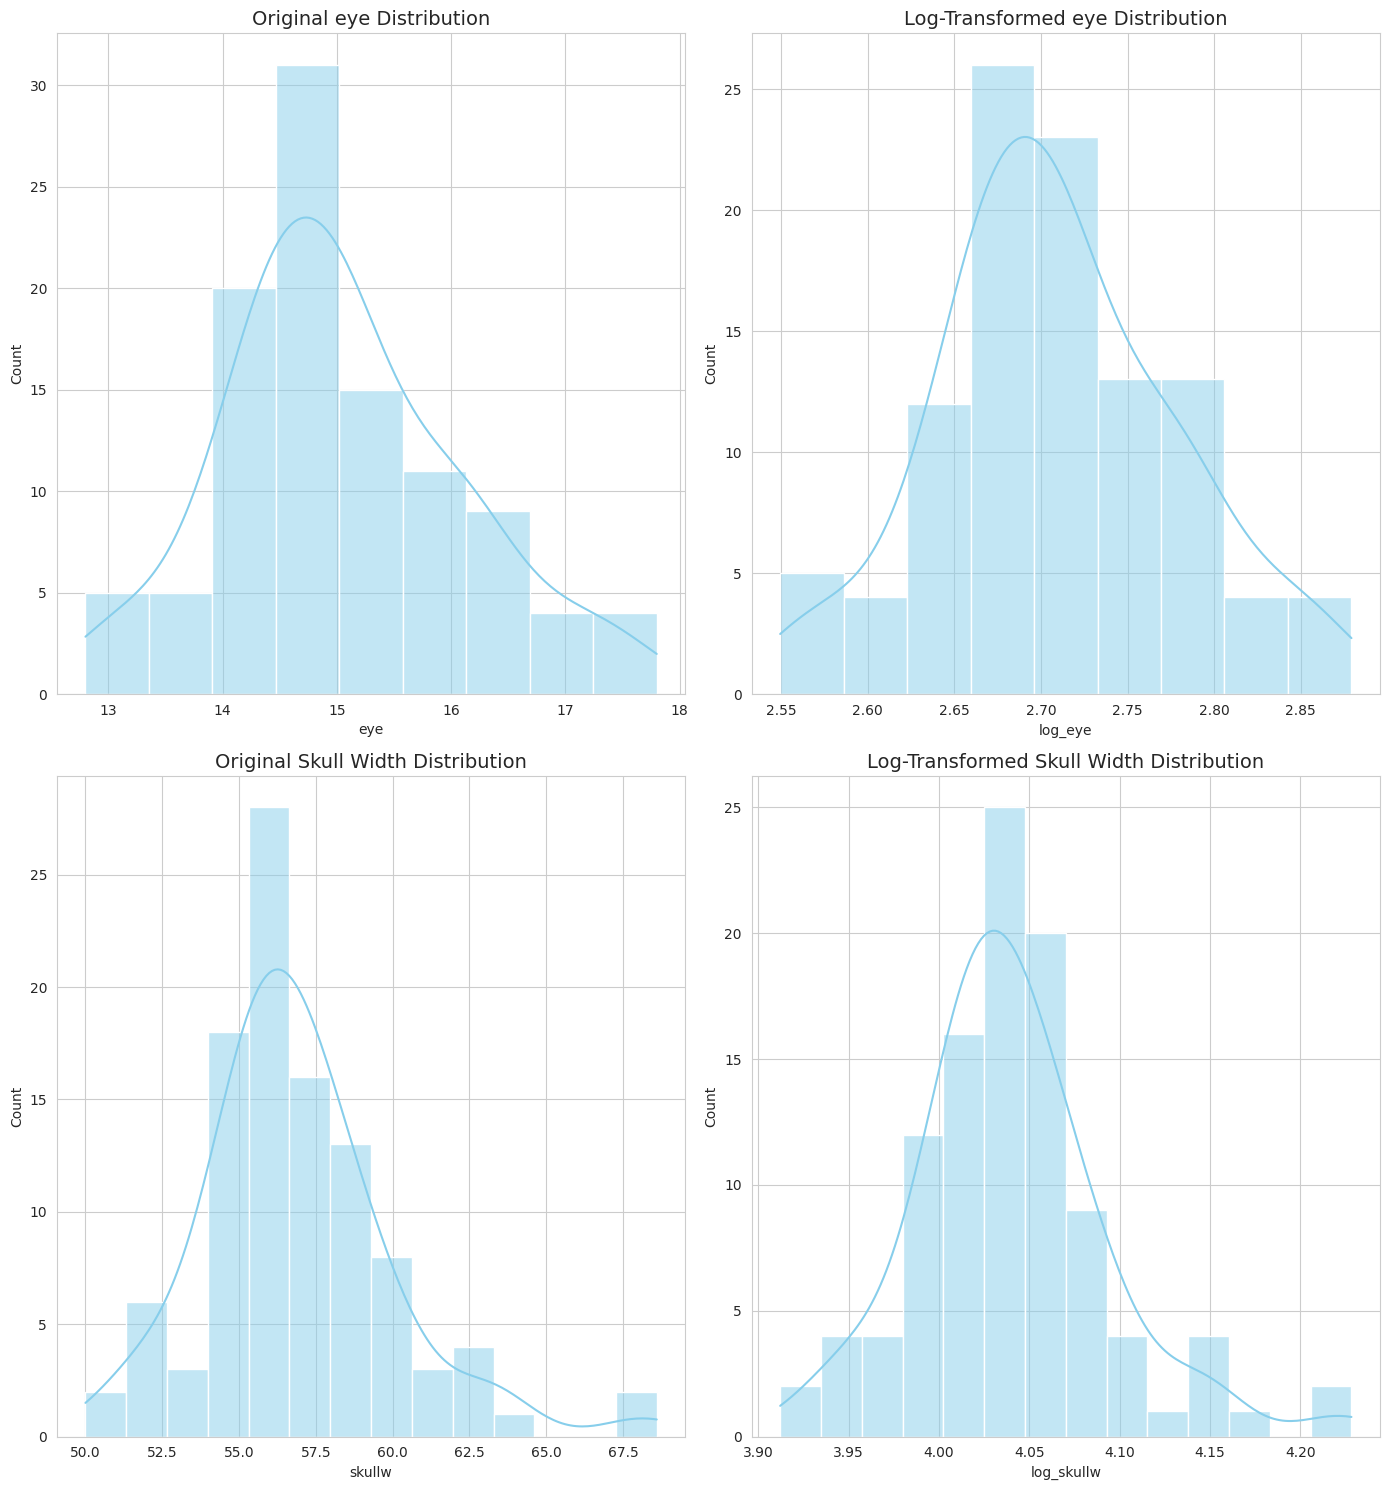

In [ ]:
# Applying log transformations to selected variables
possum_data['log_eye'] = np.log(possum_data['eye'])
possum_data['log_skullw'] = np.log(possum_data['skullw'])

# Plotting the original and log-transformed distributions of the selected variables
fig, axs = plt.subplots(2, 2, figsize=(14, 15))

# Original distributions
sns.histplot(data=possum_data, x='eye', kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Original eye Distribution', fontsize=14)
sns.histplot(data=possum_data, x='skullw', kde=True, ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title('Original Skull Width Distribution', fontsize=14)

# Log-transformed distributions
sns.histplot(data=possum_data, x='log_eye', kde=True, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('Log-Transformed eye Distribution', fontsize=14)
sns.histplot(data=possum_data, x='log_skullw', kde=True, ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title('Log-Transformed Skull Width Distribution', fontsize=14)

# Adjusting layout
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object for 2nd degree polynomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Selecting the variables for polynomial transformation
poly_vars = ['earconch', 'footlgth']
possum_data_poly = possum_data[poly_vars].dropna()  # Drop NA values for safe transformation

# Apply polynomial transformation
poly_data = poly_features.fit_transform(possum_data_poly)

# Creating a DataFrame for the transformed variables
poly_columns = [f"{var}^2" for var in poly_vars] + [f"{poly_vars[0]}*{poly_vars[1]}"]
poly_df = pd.DataFrame(poly_data, columns=poly_vars + poly_columns)

# Merge the new polynomial features into the original dataframe
possum_data_poly = possum_data_poly.reset_index(drop=True)  # Resetting the index to allow for correct row-wise concatenation
possum_data_with_poly = pd.concat([possum_data_poly, poly_df[poly_columns]], axis=1)

# Showing the dataframe with the new polynomial features
possum_data_with_poly.head()


,earconch,footlgth,earconch^2,footlgth^2,earconch*footlgth
0,54.5,74.5,2970.25,4060.25,5550.25
1,51.2,72.5,2621.44,3712.00,5256.25
2,51.9,75.4,2693.61,3913.26,5685.16
3,52.2,76.1,2724.84,3972.42,5791.21
4,53.2,71.0,2830.24,3777.20,5041.00


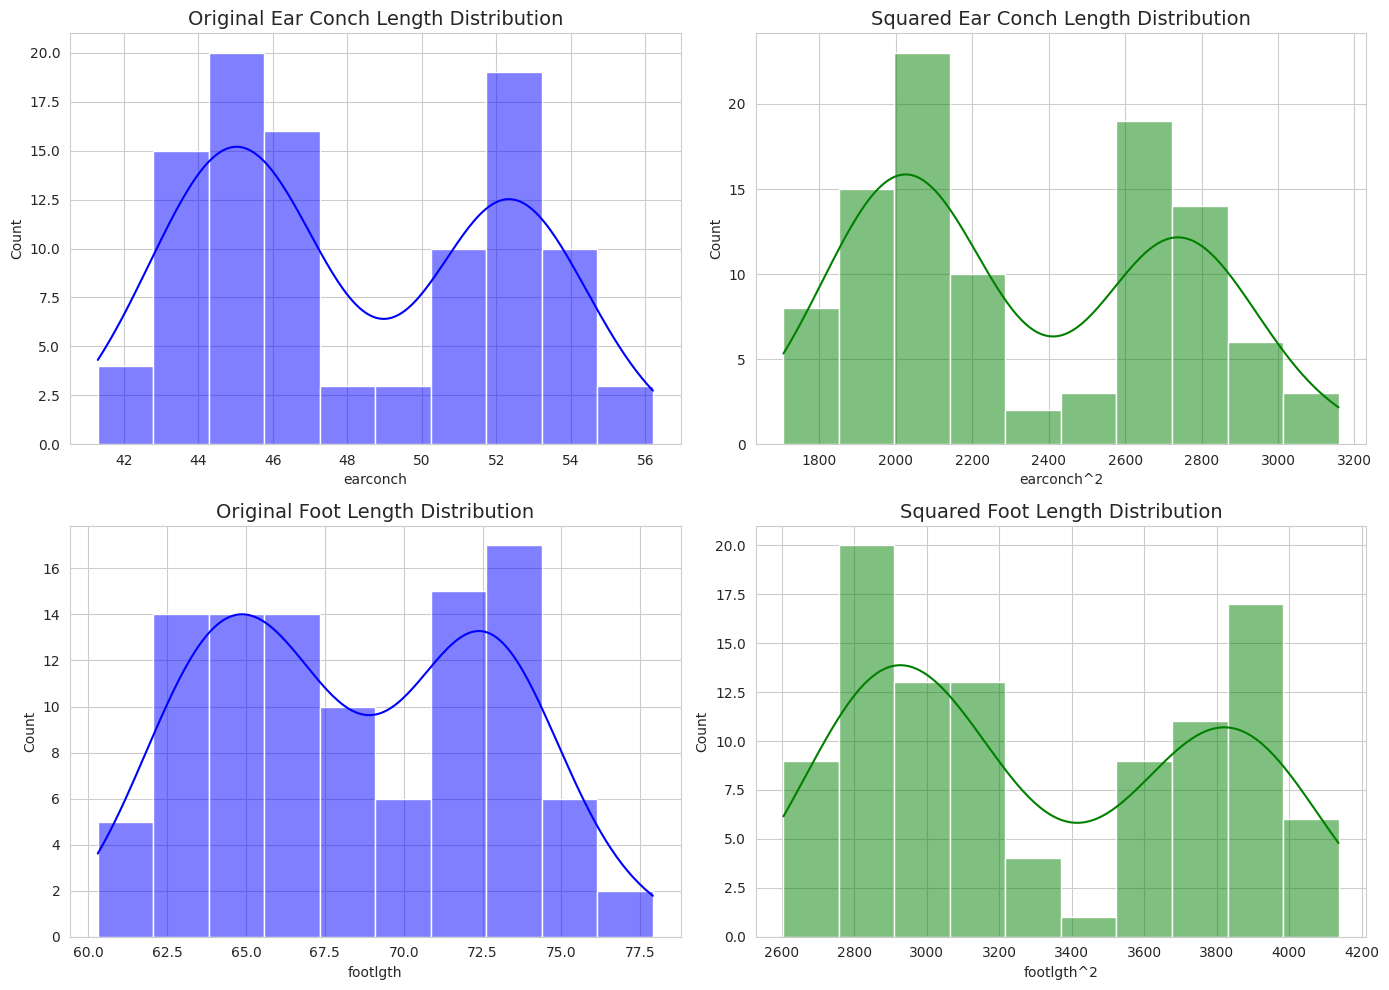

In [ ]:
possum_data_with_age = pd.concat([possum_data['age'].reset_index(drop=True), possum_data_with_poly], axis=1)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Original earconch histogram
sns.histplot(x='earconch', data=possum_data_with_age, kde=True, ax=axs[0, 0], color='blue', bins=10)
axs[0, 0].set_title('Original Ear Conch Length Distribution', fontsize=14)

# Polynomial earconch^2 histogram
sns.histplot(x='earconch^2', data=possum_data_with_age, kde=True, ax=axs[0, 1], color='green', bins=10)
axs[0, 1].set_title('Squared Ear Conch Length Distribution', fontsize=14)

# Original footlgth histogram
sns.histplot(x='footlgth', data=possum_data_with_age, kde=True, ax=axs[1, 0], color='blue', bins=10)
axs[1, 0].set_title('Original Foot Length Distribution', fontsize=14)

# Polynomial footlgth^2 histogram
sns.histplot(x='footlgth^2', data=possum_data_with_age, kde=True, ax=axs[1, 1], color='green', bins=10)
axs[1, 1].set_title('Squared Foot Length Distribution', fontsize=14)

# Adjusting layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Apply log transformations to the 'skullw' and 'eye' variables
# We replace 0 with NaN to avoid issues with log(0) and then drop these NaN values
possum_data['skullw'] = np.log(possum_data['skullw'].replace(0, np.nan)).dropna()
possum_data['eye'] = np.log(possum_data['eye'].replace(0, np.nan)).dropna()

# Apply polynomial transformations to 'earconch' and 'footlgth'
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_vars = ['earconch', 'footlgth']
# Drop NA values to ensure we can fit the polynomial features
possum_data_poly = possum_data[poly_vars].dropna()
poly_data = poly_features.fit_transform(possum_data_poly)
# Create new column names for the polynomial features to avoid name conflicts
poly_column_names = [f"{var}^2" for var in poly_vars] + [f"{poly_vars[0]}_{poly_vars[1]}"]
poly_df = pd.DataFrame(poly_data, columns=poly_vars + poly_column_names, index=possum_data_poly.index)

# Join the polynomial features with the original dataframe, avoiding name conflicts
possum_data = possum_data.join(poly_df[poly_column_names])

# Drop all rows with NaN values to ensure a clean dataset for modeling
possum_data = possum_data.dropna(subset=['age', 'skullw', 'eye'] + poly_column_names)

# Define the feature set and target variable
feature_columns = ['skullw', 'eye', 'earconch', 'earconch^2', 'footlgth', 'footlgth^2']
X = possum_data[feature_columns]
y = possum_data['age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate R^2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Fit the model using statsmodels to get p-values
X_train_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary of the model
model_summary = model_sm.summary()

# Output the R^2 scores and model summary
r2_train, r2_test, model_summary


(0.1524590024354857,
 0.03847084289977787,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    age   R-squared:                       0.152
 Model:                            OLS   Adj. R-squared:                  0.083
 Method:                 Least Squares   F-statistic:                     2.189
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0536
 Time:                        01:35:02   Log-Likelihood:                -155.76
 No. Observations:                  80   AIC:                             325.5
 Df Residuals:                      73   BIC:                             342.2
 Df Model:                           6                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------

The R2 score on the training data is approximately 0.152, meaning that about 15.2% of the variance in the age variable is explained by the model. <br>
The R2 score on the test data is approximately 0.038, which is quite low, suggesting the model does not generalize well to unseen data.

In [ ]:
# Fit the model using the original (non-transformed) variables
original_vars = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
X_original = possum_data[original_vars].dropna()  # Drop NA to ensure a clean dataset
y_original = possum_data['age'].loc[X_original.index]  # Align the target variable with the dropped NA

# Split the original data into training and testing sets
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42)

# Fit the Linear Regression model on the original variables
model_original = LinearRegression()
model_original.fit(X_train_original, y_train_original)

# Make predictions on the training and testing sets using the original variables
y_pred_train_original = model_original.predict(X_train_original)
y_pred_test_original = model_original.predict(X_test_original)

# Calculate R^2 score for the original variables
r2_train_original = r2_score(y_train_original, y_pred_train_original)
r2_test_original = r2_score(y_test_original, y_pred_test_original)

# Fit the model using statsmodels to get p-values for the original variables
X_train_original_with_const = sm.add_constant(X_train_original)  # Add a constant for the OLS model
model_sm_original = sm.OLS(y_train_original, X_train_original_with_const).fit()

# Get the summary of the model using original variables
model_summary_original = model_sm_original.summary()

r2_train_original, r2_test_original, model_summary_original

(0.23317251556472207,
 0.021321204030049,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    age   R-squared:                       0.233
 Model:                            OLS   Adj. R-squared:                  0.135
 Method:                 Least Squares   F-statistic:                     2.365
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0214
 Time:                        01:35:03   Log-Likelihood:                -151.76
 No. Observations:                  80   AIC:                             323.5
 Df Residuals:                      70   BIC:                             347.3
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------

Comparing the results of the linear regression model before and after the transformation of variables:

### Before Transformation:
- **Training \( R^2 \) Score:** 0.233 (23.3% of variance in age explained by the model)
- **Testing \( R^2 \) Score:** 0.023 (2.3% of variance in age explained by the model)
- **P-values:** None of the variables had p-values below 0.05, indicating none were statistically significant predictors of `age` at the 5% significance level.

### After Transformation:
- **Training \( R^2 \) Score:** 0.152 (15.2% of variance in age explained by the model)
- **Testing \( R^2 \) Score:** 0.038 (3.8% of variance in age explained by the model)
- **P-values:** The transformed variables `log_skullw` and `log_eye` had p-values below 0.05, indicating they were statistically significant predictors of `age`.



In [ ]:
# Define a function to perform the regression and return the necessary statistics
def perform_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate R^2 score
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Fit the model using statsmodels to get p-values
    X_train_with_const = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_train_with_const).fit()

    # Get the summary of the model
    model_summary = model_sm.summary()

    return r2_train, r2_test, model_sm

# Perform regression with all original and transformed variables
all_vars = original_vars + ['earconch^2', 'footlgth^2', 'earconch_footlgth']
X_all = possum_data[all_vars].dropna()  # Drop NA to ensure a clean dataset
y_all = possum_data['age'].loc[X_all.index]  # Align the target variable with the dropped NA

# Run the regression on the full model and capture the statistics
r2_train_all, r2_test_all, model_all = perform_regression(X_all, y_all)

# Output the R^2 scores and model summary for the full model
r2_train_all, r2_test_all, model_all.summary()


(0.23933866476974075,
 0.06979618919037478,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    age   R-squared:                       0.239
 Model:                            OLS   Adj. R-squared:                  0.103
 Method:                 Least Squares   F-statistic:                     1.757
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):             0.0741
 Time:                        01:35:03   Log-Likelihood:                -151.43
 No. Observations:                  80   AIC:                             328.9
 Df Residuals:                      67   BIC:                             359.8
 Df Model:                          12                                         
 Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 ------------------

In [ ]:
# Iterative refinement function to remove non-significant variables one by one
def refine_model(data, target, initial_vars):
    current_vars = initial_vars.copy()
    p_value_threshold = 0.05
    improvements = True

    while improvements:
        # Perform regression with the current set of variables
        X = data[current_vars].dropna()
        y = target.loc[X.index]
        _, _, model = perform_regression(X, y)

        # Get p-values and exclude the intercept
        p_values = model.pvalues.iloc[1:]  # exclude the intercept
        max_p_value = p_values.max()  # find the maximum p-value

        if max_p_value < p_value_threshold:
            # No more improvements can be made based on p-values
            improvements = False
        else:
            # Remove the variable with the highest p-value
            var_to_remove = p_values.idxmax()
            current_vars.remove(var_to_remove)

            # Output for tracking
            print(f"Removing {var_to_remove} with p-value {max_p_value:.4f}")

    # Final model with the refined set of variables
    X_final = data[current_vars].dropna()
    y_final = target.loc[X_final.index]
    r2_train_final, r2_test_final, model_final = perform_regression(X_final, y_final)

    return r2_train_final, r2_test_final, model_final, current_vars

# Run the iterative refinement process starting with all variables
r2_train_refined, r2_test_refined, model_refined, refined_vars = refine_model(
    possum_data, possum_data['age'], all_vars
)

# Output the results of the refined model
r2_train_refined, r2_test_refined, model_refined.summary()


Removing footlgth with p-value 0.9743
Removing taill with p-value 0.9679
Removing earconch with p-value 0.9631
Removing totlngth with p-value 0.7536
Removing skullw with p-value 0.7137
Removing earconch^2 with p-value 0.4085
Removing chest with p-value 0.3511
Removing footlgth^2 with p-value 0.1300
Removing earconch_footlgth with p-value 0.3164
Removing hdlngth with p-value 0.2592


(0.17063367408888053,
 0.07664229677413625,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                    age   R-squared:                       0.171
 Model:                            OLS   Adj. R-squared:                  0.149
 Method:                 Least Squares   F-statistic:                     7.921
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):           0.000744
 Time:                        01:36:54   Log-Likelihood:                -154.89
 No. Observations:                  80   AIC:                             315.8
 Df Residuals:                      77   BIC:                             322.9
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------

Both variables are statistically significant, and the refined model has a similar R2 score to the full model on the test data, indicating that it is maintaining its predictive power while using fewer variables. This suggests that these two variables are the most relevant for predicting the age of a possum.

The model refinement process removed all other variables because they did not contribute significantly to the model. The adjusted R2 also remained relatively stable, indicating that the model's explanatory power is not overly reliant on the number of variables.

**using age as target variable** <br>
Based on the updated iterative modeling process and the evaluation of out-of-sample metrics, the final recommended model includes two predictors: `eye` and `belly`. Here's the updated justification for this recommendation:

1. **Statistical Significance**: The variables `eye` and `belly` are statistically significant with p-values of 0.037 and 0.007, respectively. This indicates that there is a strong relationship between these predictors and the target variable, age.

2. **Model Simplification**: After iterative removal of non-significant variables, the model has been simplified to include only significant predictors. This reduces the risk of overfitting and may enhance the model's generalizability.

3. **Out-of-Sample Performance**: The \( R^2 \) score on the testing set is 0.077, which is lower than the previous model's testing \( R^2 \) score. Although this score is not high, it reflects the variance in age that the model can explain based on the variables `eye` and `belly`. The decrease in \( R^2 \) suggests that while the model is simpler, it may not capture as much complexity in the data as the previous model did.

4. **Interpretability and Parsimony**: With only two variables, the model remains interpretable, and the relationship between the predictors and the target variable is straightforward to understand and explain.

5. **Potential for Generalization**: Despite the lower \( R^2 \) value, the model's reliance on statistically significant variables suggests that it may be more robust when applied to new datasets, as it is based on variables with a demonstrable influence on the target.

6. **Model Metrics Consistency**: The adjusted \( R^2 \) has decreased slightly compared to the initial full model, which indicates a reduction in the model's explanatory power. However, this is expected when moving from a more complex to a simpler model.

In conclusion, the final model's strength lies in its simplicity and the statistical significance of its predictors. It is recommended to use this model for predictions of age in possums, with the caveat that it explains a smaller portion of the variance in age compared to the previous model. The decision between the two models would ultimately depend on the trade-off between complexity and predictive power that the stakeholders are willing to make. If the goal is to maintain simplicity and focus on the most significant variables, the final model with `eye` and `belly` is the best choice.

In [14]:
# Iterative refinement function to remove non-significant variables one by one
def refine_model(data, target, initial_vars):
    current_vars = initial_vars.copy()
    p_value_threshold = 0.05
    improvements = True

    while improvements:
        # Perform regression with the current set of variables
        X = data[current_vars].dropna()
        y = target.loc[X.index]
        _, _, model = perform_regression(X, y)

        # Get p-values and exclude the intercept
        p_values = model.pvalues.iloc[1:]  # exclude the intercept
        max_p_value = p_values.max()  # find the maximum p-value

        if max_p_value < p_value_threshold:
            # No more improvements can be made based on p-values
            improvements = False
        else:
            # Remove the variable with the highest p-value
            var_to_remove = p_values.idxmax()
            current_vars.remove(var_to_remove)

            # Output for tracking
            print(f"Removing {var_to_remove} with p-value {max_p_value:.4f}")

    # Final model with the refined set of variables
    X_final = data[current_vars].dropna()
    y_final = target.loc[X_final.index]
    r2_train_final, r2_test_final, model_final = perform_regression(X_final, y_final)

    return r2_train_final, r2_test_final, model_final, current_vars

# Run the iterative refinement process starting with all variables
r2_train_refined, r2_test_refined, model_refined, refined_vars = refine_model(
    possum_data, possum_data['log_age'], all_vars)

# Output the results of the refined model
r2_train_refined, r2_test_refined, model_refined.summary()


Removing skullw with p-value 0.9309
Removing footlgth with p-value 0.9030
Removing taill with p-value 0.7798
Removing earconch with p-value 0.6545
Removing totlngth with p-value 0.6306
Removing chest with p-value 0.4195
Removing earconch^2 with p-value 0.4476
Removing eye with p-value 0.1251
Removing footlgth^2 with p-value 0.1543
Removing earconch_footlgth with p-value 0.0769


(0.22980116314792076,
 0.18703855827424654,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                log_age   R-squared:                       0.230
 Model:                            OLS   Adj. R-squared:                  0.210
 Method:                 Least Squares   F-statistic:                     11.49
 Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.31e-05
 Time:                        01:52:07   Log-Likelihood:                -56.347
 No. Observations:                  80   AIC:                             118.7
 Df Residuals:                      77   BIC:                             125.8
 Df Model:                           2                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------

**using log_age as target variable**

The results from your iterative modeling process, where the target variable is the logarithm of age (`log_age`), suggest a different set of predictors compared to the previous model with the non-transformed age variable. The final model now includes `hdlngth` (head length) and `belly` (belly girth) as predictors. Here's an updated discussion based on these results:

### Model Summary with `log_age` as the Target Variable:
- **Dependent Variable**: The logarithmic transformation of age (`log_age`) was used as the target variable, indicating a preference for modeling the multiplicative relationships in the data rather than additive ones.
- **Predictors**: After iterative removal of variables based on their p-values, the final model retained `hdlngth` and `belly`.
- **R-squared**: The model has an \( R^2 \) value of 0.230 on the training data, indicating that it explains 23% of the variance in the logarithm of age among possums.
- **Adjusted R-squared**: The adjusted \( R^2 \) is slightly lower at 0.210, which accounts for the number of predictors and the sample size, providing a more adjusted estimate of the fit.
- **F-statistic**: The F-statistic and its associated p-value (Prob(F-statistic)) suggest the model is statistically significant.

### Discussion Points:
1. **Logarithmic Transformation of Age**: The use of `log_age` as the target variable may suggest that the relationship between the predictors and the age of possums is better modeled in a logarithmic scale. This can often stabilize the variance and make the model more interpretable when dealing with exponential growth or decay relationships.

2. **Predictors**: The inclusion of `hdlngth` and `belly` in the final model indicates that these two measurements are statistically significant predictors of the logarithm of the age of possums. The coefficients for both predictors are positive, suggesting that as the head length and belly girth increase, so does the log of the age, indicating a likely exponential increase in the actual age.

3. **Out-of-Sample Performance**: The \( R^2 \) score on the testing set is 0.187, which, while not very high, indicates that the model has some predictive power and can explain a reasonable proportion of the variance in the logarithm of age.

4. **Model Simplicity and Interpretability**: The final model is simple, with only two predictors, making it easily interpretable. This can be particularly useful when the model needs to be explained to stakeholders who may not have a technical background.

5. **Condition Number**: The condition number is quite large (2.66e+03), which suggests the potential for multicollinearity. This may indicate that the predictors are not entirely independent of each other, which can affect the stability and interpretation of the model coefficients.

In conclusion, the final model using the log-transformed age variable with `hdlngth` and `belly` as predictors appears to be a reasonable compromise between simplicity and explanatory power. It is statistically significant, moderately predictive, and interpretable. However, the potential issues highlighted by the condition number should be investigated further, possibly by examining correlations between predictors or by applying regularization techniques that can help mitigate multicollinearity.